<a href="https://colab.research.google.com/github/TheMonarch00/Ed-Tech-Market-Segmentation/blob/main/MarketSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('/content/drive/MyDrive/feynn labs/dataset.csv')
df.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [3]:
df.shape

(640, 118)

In [4]:
df.drop(['SC','Male_SC','Female_SC','ST','Male_ST','Female_ST','Male_Workers','Female_Workers','Hindus','Muslims','Christians','Sikhs',
         'Buddhists','Jains','Others_Religions','Religion_Not_Stated','LPG_or_PNG_Households','Households_with_Bicycle',
         'Households_with_Car_Jeep_Van','Households_with_Radio_Transistor','Households_with_Scooter_Motorcycle_Moped',
         'Married_couples_1_Households','Married_couples_2_Households','Married_couples_3_Households','Married_couples_3_or_more_Households',
         'Married_couples_4_Households','Married_couples_5__Households','Married_couples_None_Households','Household_size_1_person_Households',
         'Household_size_2_persons_Households','Household_size_1_to_2_persons','Household_size_3_persons_Households',
         'Household_size_3_to_5_persons_Households','Household_size_4_persons_Households','Household_size_5_persons_Households',
         'Household_size_6_8_persons_Households','Household_size_9_persons_and_above_Households',
         'Location_of_drinking_water_source_Away_Households','Type_of_bathing_facility_Enclosure_without_roof_Households',
         'Type_of_fuel_used_for_cooking_Any_other_Households','Type_of_latrine_facility_Pit_latrine_Households',
         'Type_of_latrine_facility_Other_latrine_Households','Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households',
         'Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households',
         'Not_having_bathing_facility_within_the_premises_Total_Households',
         'Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households',
         'Main_source_of_drinking_water_Un_covered_well_Households','Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households',
         'Main_source_of_drinking_water_Spring_Households','Main_source_of_drinking_water_River_Canal_Households',
         'Main_source_of_drinking_water_Other_sources_Households',
         'Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households',
         'Location_of_drinking_water_source_Near_the_premises_Households','Location_of_drinking_water_source_Within_the_premises_Households',
         'Main_source_of_drinking_water_Tank_Pond_Lake_Households','Main_source_of_drinking_water_Tapwater_Households',
         'Main_source_of_drinking_water_Tubewell_Borehole_Households','Condition_of_occupied_census_houses_Dilapidated_Households',
         'Households_with_separate_kitchen_Cooking_inside_house','Having_bathing_facility_Total_Households',
         'Having_latrine_facility_within_the_premises_Total_Households','Ownership_Owned_Households','Ownership_Rented_Households',
         'Households_with_Telephone_Mobile_Phone_Landline_only','Households_with_Telephone_Mobile_Phone_Mobile_only',
         'Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car','Households_with_Television','Households_with_Telephone_Mobile_Phone',
         'Households_with_Telephone_Mobile_Phone_Both','Power_Parity_Rs_45000_90000','Power_Parity_Rs_90000_150000','Power_Parity_Rs_45000_150000',
         'Power_Parity_Rs_150000_240000','Power_Parity_Rs_240000_330000','Power_Parity_Rs_150000_330000','Power_Parity_Rs_330000_425000',
         'Power_Parity_Rs_425000_545000','Power_Parity_Rs_330000_545000','Power_Parity_Above_Rs_545000','Total_Power_Parity','Male_Literate',
         'Female_Literate','Workers','Main_Workers','Marginal_Workers','Non_Workers','Cultivator_Workers','Agricultural_Workers','Household_Workers',
         'Other_Workers','Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education',
         'Other_Education','Literate_Education','Illiterate_Education','Total_Education','Housholds_with_Electric_Lighting',
         'Power_Parity_Less_than_Rs_45000'], axis=1, inplace= True)

In [5]:
df.isna().sum()

District code               0
State name                  0
District name               0
Population                  0
Male                        0
Female                      0
Literate                    0
Households_with_Internet    0
Households_with_Computer    0
Rural_Households            0
Urban_Households            0
Households                  0
Age_Group_0_29              0
Age_Group_30_49             0
Age_Group_50                0
Age not stated              0
dtype: int64

In [6]:
df.shape

(640, 16)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   District code             640 non-null    int64 
 1   State name                640 non-null    object
 2   District name             640 non-null    object
 3   Population                640 non-null    int64 
 4   Male                      640 non-null    int64 
 5   Female                    640 non-null    int64 
 6   Literate                  640 non-null    int64 
 7   Households_with_Internet  640 non-null    int64 
 8   Households_with_Computer  640 non-null    int64 
 9   Rural_Households          640 non-null    int64 
 10  Urban_Households          640 non-null    int64 
 11  Households                640 non-null    int64 
 12  Age_Group_0_29            640 non-null    int64 
 13  Age_Group_30_49           640 non-null    int64 
 14  Age_Group_50              

In [8]:
df.describe()

,District code,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
count,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000,640.000000,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,6.400000e+02,640.000000
mean,320.500000,1.891961e+06,9.738598e+05,9.181011e+05,1.193186e+06,12044.564062,36504.446875,3.448374e+05,1.720935e+05,5.169309e+05,1.102826e+06,4.820189e+05,3.001005e+05,7015.315625
std,184.896367,1.544380e+06,8.007785e+05,7.449864e+05,1.068583e+06,33573.205832,63249.671664,2.595673e+05,3.032489e+05,4.417897e+05,8.887434e+05,4.183230e+05,2.549556e+05,15053.222449
min,1.000000,8.004000e+03,4.414000e+03,3.590000e+03,4.436000e+03,17.000000,133.000000,0.000000e+00,0.000000e+00,3.230000e+03,5.113000e+03,2.088000e+03,7.860000e+02,16.000000
25%,160.750000,8.178610e+05,4.171682e+05,4.017458e+05,4.825982e+05,1406.750000,9637.250000,1.685155e+05,3.330575e+04,2.313620e+05,4.786540e+05,2.101965e+05,1.193285e+05,664.250000
50%,320.500000,1.557367e+06,7.986815e+05,7.589200e+05,9.573465e+05,3489.000000,19720.500000,3.002140e+05,7.689150e+04,4.140750e+05,8.896820e+05,3.905085e+05,2.421020e+05,1735.000000
75%,480.250000,2.583551e+06,1.338604e+06,1.264277e+06,1.602260e+06,8820.500000,38290.500000,4.622140e+05,1.857615e+05,7.019525e+05,1.491204e+06,6.525142e+05,4.045875e+05,5549.250000
max,640.000000,1.106015e+07,5.865078e+06,5.195070e+06,8.227161e+06,430880.000000,790103.000000,1.568802e+06,3.078829e+06,3.618151e+06,6.184519e+06,3.241888e+06,1.921143e+06,135852.000000


In [9]:
temp=px.histogram(df,x="State name",y = "Population",title='Population against State Analysis')
temp.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
temp.show()

In [10]:
temp=px. histogram(df,x="State name",y="Literate",title="Literate Population against State Analysis")
temp.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
temp.show()

In [11]:
temp=px.histogram(df,x="State name",y="Households_with_Internet",title = "Households with Internet Population Analysis against state")
temp.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
temp.show()

In [12]:
Maharashtra=df[df['State name']=="MAHARASHTRA"]
Tamil_Nadu=df[df['State name']=="TAMIL NADU"]
Karnataka=df[df['State name']=="KARNATAKA"]
Uttar_Pradesh=df[df['State name']=="UTTAR PRADESH"]
Andhra_Pradesh=df[df['State name']=="ANDHRA PRADESH"]

In [13]:
def district(state):
    temp=px.histogram(state,x="District name",y="Population",title='Population against Districts')
    temp.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
    temp.show()

    temp=px.histogram(state,x="District name",y="Literate",title='Literate Population against Districts')
    temp.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
    temp.show()

    temp=px.histogram(state,x="District name",y="Households_with_Internet")
    temp.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
    temp.show()

In [14]:
district(Maharashtra)

In [15]:
district(Tamil_Nadu)

In [16]:
district(Karnataka)

In [17]:
district(Uttar_Pradesh)

In [18]:

district(Andhra_Pradesh)

In [19]:
data=pd.concat([Maharashtra,Tamil_Nadu,Karnataka,Uttar_Pradesh,Andhra_Pradesh],axis=0)
data

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
496,497,MAHARASHTRA,Nandurbar,1648295,833170,815125,906509,2579,17047,333440,71572,405012,1011352,390419,241534,4990
497,498,MAHARASHTRA,Dhule,2050862,1054031,996831,1293916,6065,27139,382777,146013,528790,1167569,513908,350747,18638
498,499,MAHARASHTRA,Jalgaon,4229917,2197365,2032552,2891882,14297,56775,796223,373565,1169788,2352671,1080237,763529,33480
499,500,MAHARASHTRA,Buldana,2586258,1337560,1248698,1879874,4767,24877,575405,152787,728192,1467457,641840,473071,3890
500,501,MAHARASHTRA,Akola,1813906,932334,881572,1411281,6163,24232,308158,196077,504235,998769,483200,327932,4005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,550,ANDHRA PRADESH,Sri Potti Sriramulu Nellore,2963557,1492974,1470583,1832189,10201,39583,689137,264376,953513,1574713,840448,544022,4374
550,551,ANDHRA PRADESH,Y.S.R.,2882469,1451777,1430692,1716766,6667,39923,590589,293504,884093,1553667,793583,530412,4807
551,552,ANDHRA PRADESH,Kurnool,4053463,2039227,2014236,2127161,10081,56478,783853,306982,1090835,2368684,1053618,609027,22134
552,553,ANDHRA PRADESH,Anantapur,4081148,2064495,2016653,2310960,8606,48299,902997,341431,1244428,2189396,1104565,739612,47575


In [20]:
temp=px.sunburst(data,path=['State name','District name'],values='Population',color='Households_with_Internet',color_continuous_scale='RdBu',title = 'Finding out best Market')
temp.update_layout(autosize=False,width=1000,height=1000)
temp.show()

In [21]:
data.corr()

,District code,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
District code,1.000000,-0.060488,-0.085956,-0.032368,0.070441,0.154041,0.149632,-0.061828,0.215922,0.158719,-0.204594,0.117780,0.177359,-0.305794
Population,-0.060488,1.000000,0.998798,0.998552,0.966989,0.706302,0.784326,0.567217,0.784053,0.953193,0.984103,0.973473,0.946510,0.485226
Male,-0.085956,0.998798,1.000000,0.994714,0.965820,0.713366,0.788839,0.547243,0.789413,0.948355,0.986827,0.969304,0.936211,0.489090
Female,-0.032368,0.998552,0.994714,1.000000,0.965596,0.696596,0.777203,0.587570,0.776000,0.955864,0.978390,0.975353,0.955194,0.479643
Literate,0.070441,0.966989,0.965820,0.965596,1.000000,0.810513,0.872331,0.428845,0.882471,0.973088,0.920015,0.985428,0.959040,0.379933
Households_with_Internet,0.154041,0.706302,0.713366,0.696596,0.810513,1.000000,0.988037,-0.087410,0.955763,0.791220,0.639953,0.789358,0.696390,0.237991
Households_with_Computer,0.149632,0.784326,0.788839,0.777203,0.872331,0.988037,1.000000,0.025812,0.971984,0.859247,0.720461,0.857633,0.769476,0.286269
Rural_Households,-0.061828,0.567217,0.547243,0.587570,0.428845,-0.087410,0.025812,1.000000,0.017048,0.490846,0.579474,0.481058,0.583646,0.301036
Urban_Households,0.215922,0.784053,0.789413,0.776000,0.882471,0.955763,0.971984,0.017048,1.000000,0.879487,0.706828,0.873013,0.791170,0.269389
Households,0.158719,0.953193,0.948355,0.955864,0.973088,0.791220,0.859247,0.490846,0.879487,1.000000,0.891735,0.989699,0.967215,0.378028


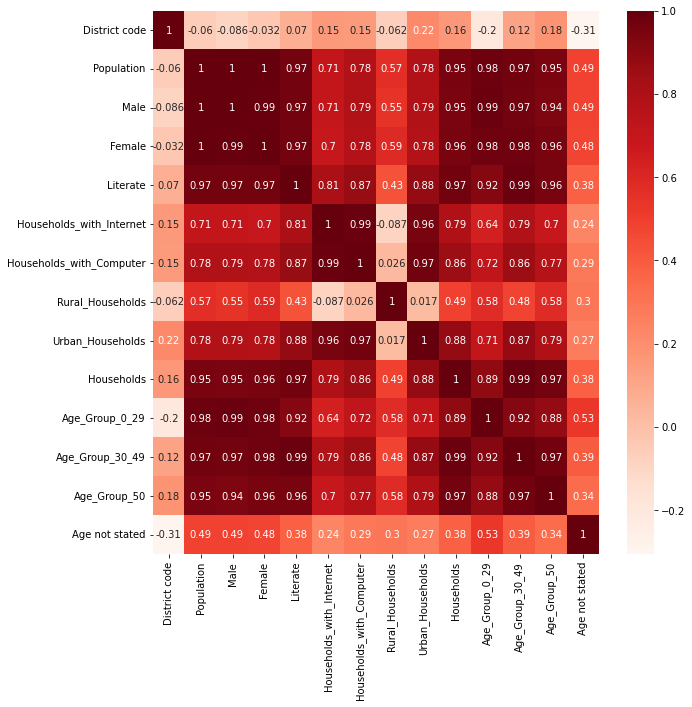

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),cmap='Reds',annot=True)

In [23]:
data

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
496,497,MAHARASHTRA,Nandurbar,1648295,833170,815125,906509,2579,17047,333440,71572,405012,1011352,390419,241534,4990
497,498,MAHARASHTRA,Dhule,2050862,1054031,996831,1293916,6065,27139,382777,146013,528790,1167569,513908,350747,18638
498,499,MAHARASHTRA,Jalgaon,4229917,2197365,2032552,2891882,14297,56775,796223,373565,1169788,2352671,1080237,763529,33480
499,500,MAHARASHTRA,Buldana,2586258,1337560,1248698,1879874,4767,24877,575405,152787,728192,1467457,641840,473071,3890
500,501,MAHARASHTRA,Akola,1813906,932334,881572,1411281,6163,24232,308158,196077,504235,998769,483200,327932,4005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,550,ANDHRA PRADESH,Sri Potti Sriramulu Nellore,2963557,1492974,1470583,1832189,10201,39583,689137,264376,953513,1574713,840448,544022,4374
550,551,ANDHRA PRADESH,Y.S.R.,2882469,1451777,1430692,1716766,6667,39923,590589,293504,884093,1553667,793583,530412,4807
551,552,ANDHRA PRADESH,Kurnool,4053463,2039227,2014236,2127161,10081,56478,783853,306982,1090835,2368684,1053618,609027,22134
552,553,ANDHRA PRADESH,Anantapur,4081148,2064495,2016653,2310960,8606,48299,902997,341431,1244428,2189396,1104565,739612,47575


In [24]:
le=LabelEncoder()

In [25]:
data['State name'] = le.fit_transform(data['State name'])
data['District name'] = le.fit_transform(data['District name'])

In [26]:
data1=data
scaler=StandardScaler()
segmentation=scaler.fit_transform(data1)
segmentation=pd.DataFrame(segmentation,columns=data1.columns)

In [27]:
data1.corr()

,District code,State name,District name,Population,Male,Female,Literate,Households_with_Internet,Households_with_Computer,Rural_Households,Urban_Households,Households,Age_Group_0_29,Age_Group_30_49,Age_Group_50,Age not stated
District code,1.000000,-0.744597,0.214656,-0.060488,-0.085956,-0.032368,0.070441,0.154041,0.149632,-0.061828,0.215922,0.158719,-0.204594,0.117780,0.177359,-0.305794
State name,-0.744597,1.000000,-0.101305,-0.070854,-0.046449,-0.097443,-0.111341,-0.120777,-0.141360,-0.168539,-0.167192,-0.225910,0.032368,-0.188639,-0.229537,0.037322
District name,0.214656,-0.101305,1.000000,-0.014294,-0.022703,-0.005026,0.016363,0.006238,0.008597,0.027986,0.057453,0.063384,-0.056518,0.038273,0.054710,-0.092964
Population,-0.060488,-0.070854,-0.014294,1.000000,0.998798,0.998552,0.966989,0.706302,0.784326,0.567217,0.784053,0.953193,0.984103,0.973473,0.946510,0.485226
Male,-0.085956,-0.046449,-0.022703,0.998798,1.000000,0.994714,0.965820,0.713366,0.788839,0.547243,0.789413,0.948355,0.986827,0.969304,0.936211,0.489090
Female,-0.032368,-0.097443,-0.005026,0.998552,0.994714,1.000000,0.965596,0.696596,0.777203,0.587570,0.776000,0.955864,0.978390,0.975353,0.955194,0.479643
Literate,0.070441,-0.111341,0.016363,0.966989,0.965820,0.965596,1.000000,0.810513,0.872331,0.428845,0.882471,0.973088,0.920015,0.985428,0.959040,0.379933
Households_with_Internet,0.154041,-0.120777,0.006238,0.706302,0.713366,0.696596,0.810513,1.000000,0.988037,-0.087410,0.955763,0.791220,0.639953,0.789358,0.696390,0.237991
Households_with_Computer,0.149632,-0.141360,0.008597,0.784326,0.788839,0.777203,0.872331,0.988037,1.000000,0.025812,0.971984,0.859247,0.720461,0.857633,0.769476,0.286269
Rural_Households,-0.061828,-0.168539,0.027986,0.567217,0.547243,0.587570,0.428845,-0.087410,0.025812,1.000000,0.017048,0.490846,0.579474,0.481058,0.583646,0.301036


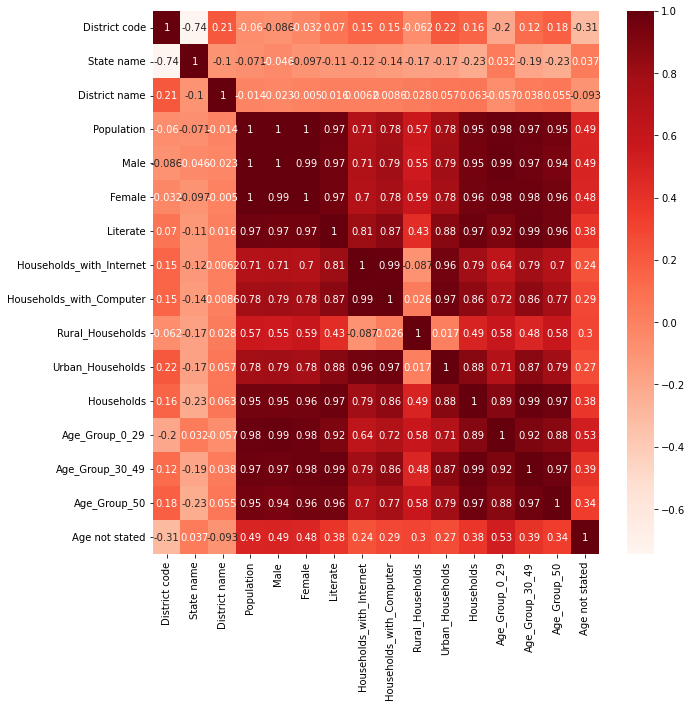

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(data1.corr(),cmap='Reds',annot=True)

In [29]:
segmentation=pd.DataFrame(segmentation)
print(segmentation.max())

District code               1.128665
State name                  1.043624
District name               1.723006
Population                  5.250251
Male                        5.369545
Female                      5.104793
Literate                    5.575800
Households_with_Internet    7.610601
Households_with_Computer    7.588663
Rural_Households            3.056791
Urban_Households            6.509129
Households                  5.788950
Age_Group_0_29              5.054003
Age_Group_30_49             5.675560
Age_Group_50                4.475483
Age not stated              5.391960
dtype: float64


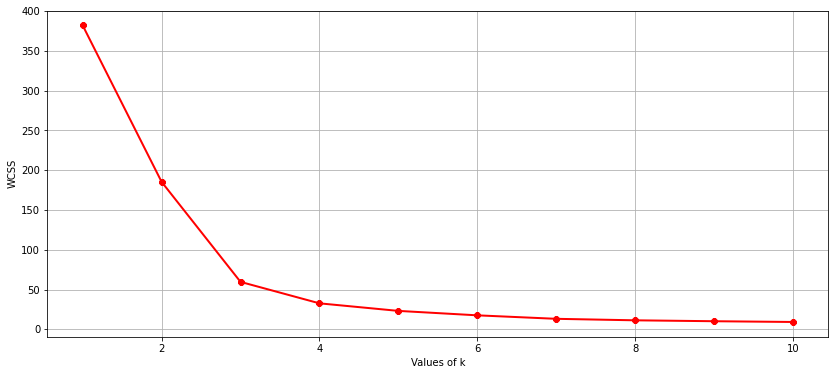

In [30]:
X=segmentation.loc[:,["Population","Literate"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(14,6))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel('Values of k')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans=KMeans(n_clusters= 3)
data['label1']=kmeans.fit_predict(X)

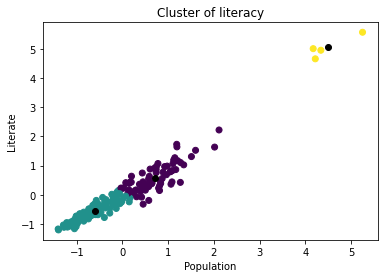

In [32]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of literacy')
plt.xlabel('Population')
plt.ylabel('Literate')
plt.show()

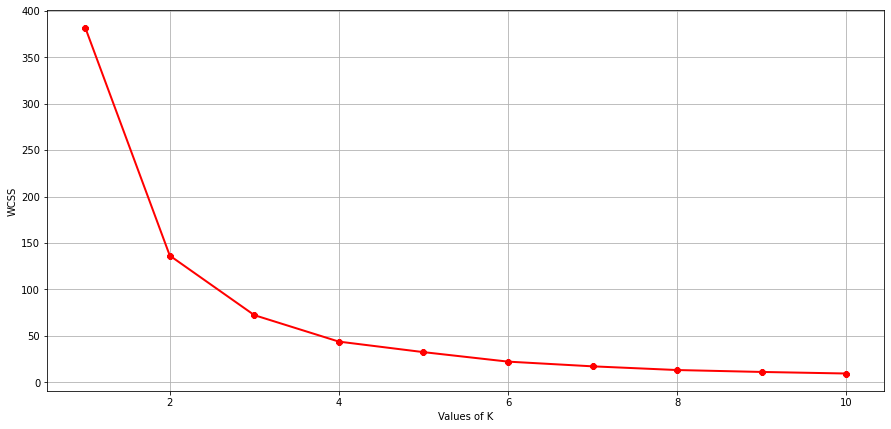

In [33]:
X=segmentation.loc[:,["Households_with_Internet","Literate"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans=KMeans(n_clusters= 3)
data['label2']=kmeans.fit_predict(X)

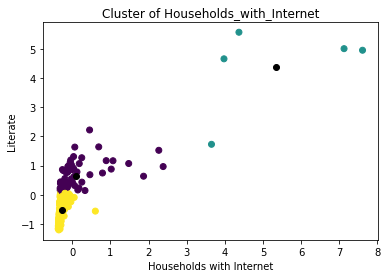

In [35]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Cluster of Households_with_Internet')
plt.xlabel('Households with Internet')
plt.ylabel('Literate')
plt.show()

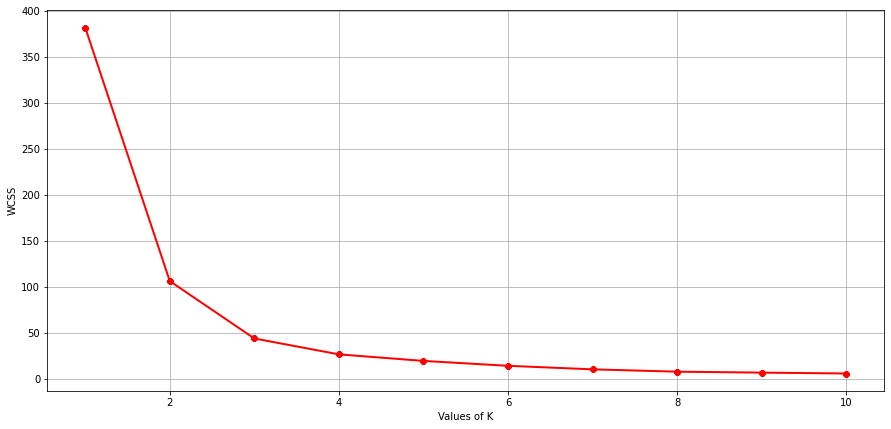

In [36]:
X=segmentation.loc[:,["Urban_Households","Households_with_Computer"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.show()

In [37]:
kmeans=KMeans(n_clusters=3)
data['label3']=kmeans.fit_predict(X)

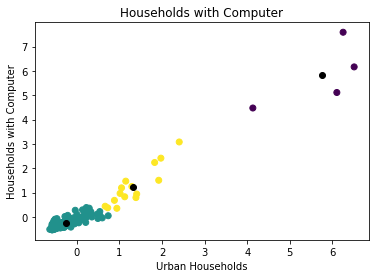

In [38]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('Households with Computer')
plt.xlabel('Urban Households')
plt.ylabel('Households with Computer')
plt.show()

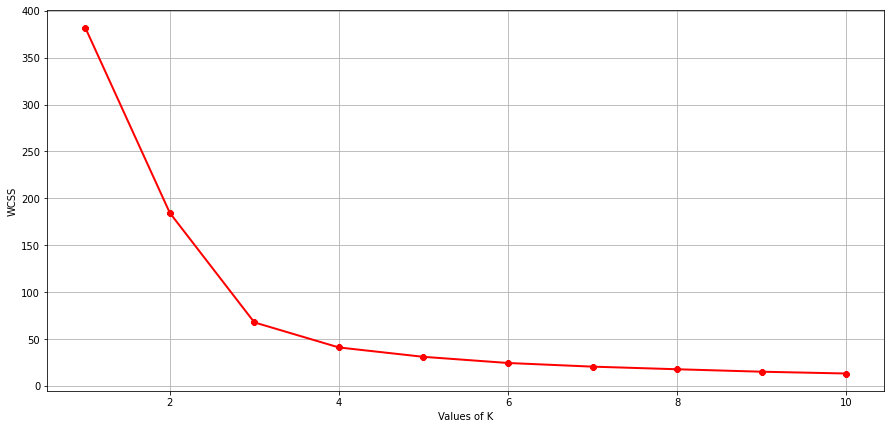

In [39]:
X=segmentation.loc[:,["Age_Group_0_29","Literate"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel('Values of K')
plt.ylabel('WCSS')
plt.show()

In [40]:
kmeans=KMeans(n_clusters=3)
data['label4']=kmeans.fit_predict(X)

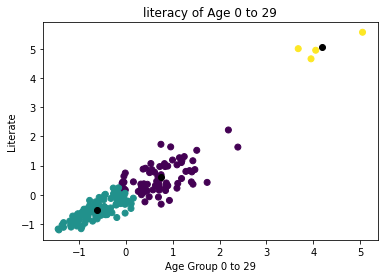

In [41]:
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title('literacy of Age 0 to 29')
plt.xlabel('Age Group 0 to 29')
plt.ylabel('Literate')
plt.show()

In [42]:
figure = px.scatter_3d(data,
                    color='label1',
                    x="Population",
                    y="Literate",
                    z="Age_Group_0_29",            
                    category_orders = {"clusters": ["0","1","2","3","4"]}                    
                    )
figure.update_layout()
figure.show()

In [43]:
figure = px.scatter_3d(data,
                    color='label2',
                    x="Households_with_Internet",
                    y="Literate",
                    z="Age_Group_0_29",            
                    category_orders = {"clusters": ["0","1","2","3","4"]}                    
                    )
figure.update_layout()
figure.show()

In [44]:
figure=px.scatter_3d(data,
                    color='label3',
                    x="Urban_Households",
                    y="Households_with_Computer",
                    z="Age_Group_0_29",            
                    category_orders = {"clusters": ["0","1","2","3","4"]}                    
                    )
figure.update_layout()
figure.show()